# Computing Maximum Drawdown

Drawdown is a decline in an investment or fund from its previous peak.

In [1]:
import pandas as pd

In [2]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [3]:
me_m = me_m/100

In [6]:
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,NaN,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,NaN,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,NaN,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,NaN,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


<AxesSubplot:>

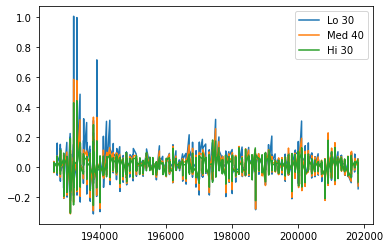

In [16]:
returns = me_m[['Lo 30', 'Med 40', 'Hi 30']]
returns.plot.line()

Fix the index. Even though we parsed it while reading the csv we haven't got the meaningful timeseries

In [17]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [19]:
returns.index = returns.index.to_period('M')
returns.head()

,Lo 30,Med 40,Hi 30
1926-07,-0.0043,0.0152,0.0268
1926-08,0.0390,0.0304,0.0209
1926-09,-0.0108,-0.0054,0.0016
1926-10,-0.0332,-0.0352,-0.0306
1926-11,-0.0046,0.0382,0.0309


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

In [20]:
def drawdown(return_series:pd.Series):
    """
    Takes a time series of asset returns.
    returns a DataFrame with columns for
        the wealth index, 
        the previous peaks, and 
        the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})
    

In [22]:
drawdown(returns['Lo 30']).head()

,Wealth,Previous Peak,Drawdown
1926-07,995.700000,995.7000,0.000000
1926-08,1034.532300,1034.5323,0.000000
1926-09,1023.359351,1034.5323,-0.010800
1926-10,989.383821,1034.5323,-0.043641
1926-11,984.832655,1034.5323,-0.048041


In [24]:
drawdown(returns['Hi 30']).head()

,Wealth,Previous Peak,Drawdown
1926-07,1026.800000,1026.800000,0.000000
1926-08,1048.260120,1048.260120,0.000000
1926-09,1049.937336,1049.937336,0.000000
1926-10,1017.809254,1049.937336,-0.030600
1926-11,1049.259560,1049.937336,-0.000646


<AxesSubplot:>

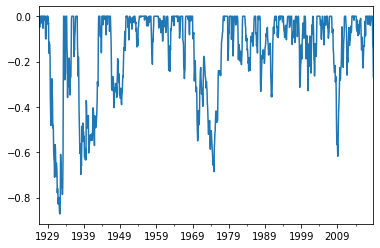

In [25]:
drawdown(returns['Lo 30'])['Drawdown'].plot.line()

In [29]:
drawdown(returns['Lo 30'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [31]:
drawdown(returns['Lo 30']["1975":])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [32]:
drawdown(returns["Lo 30"]["1975":])["Drawdown"].min()

-0.6175975335796284

<AxesSubplot:>

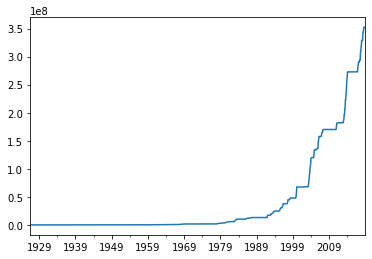

In [33]:
drawdown(returns['Lo 30'])['Previous Peak'].plot.line()